In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
dir = '/Users/kmanj/Manjavacas Research/Buenzli_2015/'
dir_save = 'C:/Users/kmanj/FITS_BD_Files/Data/Buenzli_2015/'

In [7]:
s = scipy.io.readsav('/Users/kmanj/Manjavacas Research/Buenzli_2015/luhman16_absflux.sav')
s

{'fire_absa': array([9.09112104e-17, 1.00458752e-16, 1.05804429e-16, ...,
        1.31618612e-16, 1.31589375e-16, 1.40821357e-16]),
 'fire_absb': array([1.00969005e-16, 1.06387568e-16, 1.18988148e-16, ...,
        1.05866044e-16, 1.05130715e-16, 1.03759392e-16]),
 'fire_wl': array([0.9002408, 0.900531 , 0.9008209, ..., 2.5923784, 2.5955431,
        2.5987394], dtype=float32),
 'meana': array([2.29212512e-16, 2.35528120e-16, 2.46240561e-16, 2.52923789e-16,
        2.49317649e-16, 2.39593645e-16, 2.33291787e-16, 2.31290007e-16,
        2.27317698e-16, 2.20278020e-16, 2.15082121e-16, 2.15876318e-16,
        2.20840122e-16, 2.20629017e-16, 2.12732281e-16, 2.14350728e-16,
        2.23657034e-16, 2.30917815e-16, 2.33515789e-16, 2.32378948e-16,
        2.33709512e-16, 2.31610723e-16, 2.31361843e-16, 2.35059011e-16,
        2.44690233e-16, 2.59246773e-16, 2.68407109e-16, 2.74490501e-16,
        2.79428468e-16, 2.87338871e-16, 2.95628761e-16, 3.02632406e-16,
        3.09552328e-16, 3.15882978e-

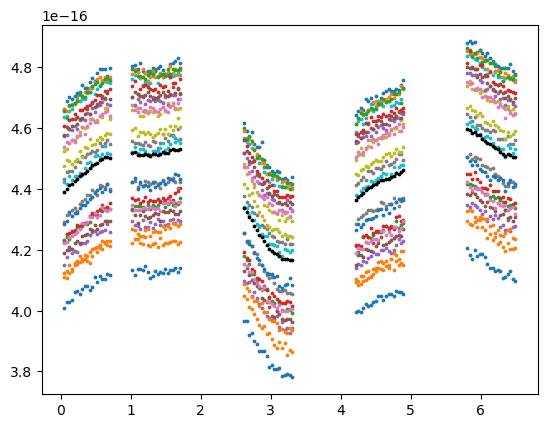

In [8]:
J = np.zeros(len(s['luh16b_flux'][0]))
count = 0
for i in range(33, 55):
    J = J + s['luh16b_flux'][i]
    count += 1
J = J / count
for i in range(33, 55):
    plt.scatter(s['time'], s['luh16b_flux'][i], s = 3)
    
plt.scatter(s['time'], J, color = 'black', s = 3)

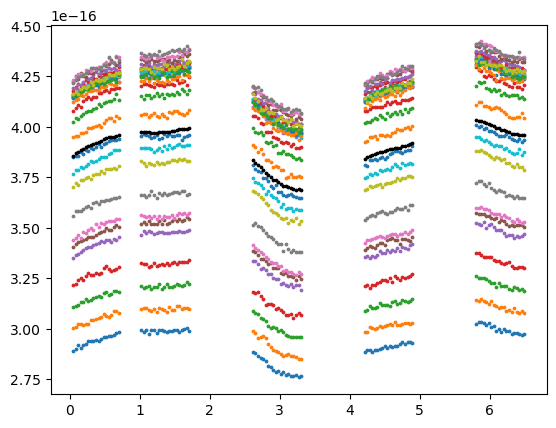

In [9]:
H = np.zeros(len(s['luh16b_flux'][0]))
count = 0
for i in range(99, 128):
    H = H + s['luh16b_flux'][i]
    count += 1
H = H / count
for i in range(99, 128):
    plt.scatter(s['time'], s['luh16b_flux'][i], s = 3)
    
plt.scatter(s['time'], H, color = 'black', s = 3)

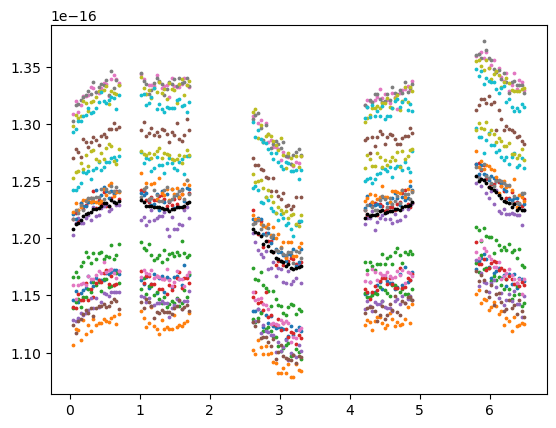

In [10]:
H2 = np.zeros(len(s['luh16b_flux'][0]))
count = 0
for i in range(61, 81):
    H2 = H2 + s['luh16b_flux'][i]
    count += 1
H2 = H2 / count
for i in range(61, 81):
    plt.scatter(s['time'], s['luh16b_flux'][i], s = 3)
    
plt.scatter(s['time'], H2, color = 'black', s = 3)

Text(0, 0.5, 'Normalized Flux Density')

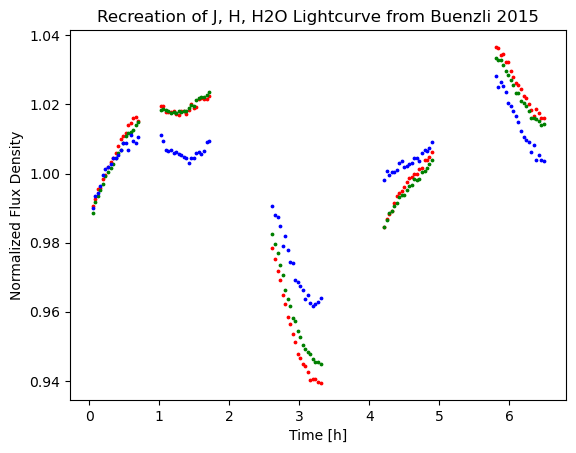

In [11]:
J_1 = 0
H_1 = 0
H2_1 = 0
for i in J:
    J_1 += i
J_2 = J_1 / len(J)

for i in H:
    H_1 += i
H_2 = H_1 / len(H)

for i in H2:
    H2_1 += i
H2_2 = H2_1 / len(H2)

J_norm = []
H_norm = []
H2_norm = []

for i in J:
    J_norm.append(i / J_2)
for i in H:
    H_norm.append(i / H_2)
for i in H2:
    H2_norm.append(i / H2_2)

plt.scatter(s['time'], J_norm, color = 'red', s = 3)
plt.scatter(s['time'], H_norm, color = 'green', s = 3)
plt.scatter(s['time'], H2_norm, color = 'blue', s = 3)
plt.title('Recreation of J, H, H2O Lightcurve from Buenzli 2015')
plt.xlabel('Time [h]')
plt.ylabel('Normalized Flux Density')

In [12]:
Reference = 'Buenzli et al 2015 ApJ 798 127'
Telescope = 'Hubble Space Telescope'
Object = 'Luhman 16B'
SpectralType = 'T0.5'
Jmag = '11.22 +/- 0.04'
Hmag = '10.39 +/- 0.04'
Kmag = '9.73 +/- 0.09'
RA = 162.3108101
DEC = -53.31810797
Instrument = 'HST/WFC3'
filter = 'G141 grism'
Date_obs = 'November 8th, 2013'
Band_obs_J = '1.22 - 1.32 microns'
Band_obs_H = '1.53 - 1.66 microns'
Band_obs_H2 = '1.35 - 1.44 microns'
TSTART = 56604.27361111
TSTOP = 56604.54583333

J_fits

In [13]:
t = []
for i in s['time']:
    t.append(i[0])
    
t1 = t * u.h
J_norm = J_norm * u.dimensionless_unscaled

In [14]:
J_norm

<Quantity [0.99047758, 0.99275117, 0.9956262 , 0.99586367, 0.99840507,
           0.99956457, 1.00192944, 1.00339862, 1.00435327, 1.00602947,
           1.00784671, 1.00991905, 1.01093261, 1.01168908, 1.01393573,
           1.01458823, 1.01599559, 1.01637029, 1.01504731, 1.01946194,
           1.01964167, 1.01767933, 1.01765175, 1.01787426, 1.01810274,
           1.01732956, 1.01691798, 1.01803923, 1.01820287, 1.01735758,
           1.01849736, 1.0200166 , 1.01887537, 1.0191982 , 1.02160774,
           1.0218201 , 1.02141957, 1.02161825, 1.0222841 , 0.9783771 ,
           0.97516379, 0.97186784, 0.96912892, 0.96491573, 0.96221899,
           0.95849742, 0.95652182, 0.9535603 , 0.95116543, 0.94785118,
           0.94649906, 0.94496554, 0.94417428, 0.94247601, 0.94035869,
           0.9404755 , 0.94041284, 0.93964755, 0.93942061, 0.98456773,
           0.98677142, 0.9882266 , 0.98923592, 0.99153868, 0.99344936,
           0.99425327, 0.99505161, 0.99612106, 0.99740251, 0.99883878,
      

In [15]:
t1

<Quantity [0.05055564, 0.08666669, 0.12277788, 0.1588889 , 0.19500099,
           0.2311129 , 0.26722497, 0.30333513, 0.33944723, 0.37555736,
           0.4116694 , 0.44777963, 0.4838916 , 0.5200018 , 0.5561138 ,
           0.5922241 , 0.628336  , 0.6644463 , 0.70055825, 1.023056  ,
           1.0591663 , 1.0952783 , 1.1313884 , 1.1675014 , 1.2036107 ,
           1.2397227 , 1.2758329 , 1.311945  , 1.3480551 , 1.3841681 ,
           1.4202774 , 1.4563894 , 1.4924996 , 1.5286115 , 1.5647218 ,
           1.60264   , 1.636944  , 1.6766666 , 1.7073601 , 2.617225  ,
           2.6533353 , 2.6894472 , 2.7255573 , 2.7616694 , 2.7977796 ,
           2.8338916 , 2.8700018 , 2.9061139 , 2.942224  , 2.978336  ,
           3.0144463 , 3.0505583 , 3.0866685 , 3.1227806 , 3.1588912 ,
           3.1950028 , 3.231113  , 3.2708356 , 3.3033352 , 4.2113886 ,
           4.2475004 , 4.283611  , 4.3197236 , 4.355833  , 4.391945  ,
           4.4280553 , 4.464167  , 4.5002775 , 4.5363903 , 4.5724998 ,
      

<Axes: xlabel='Time [JD]', ylabel='Flux'>

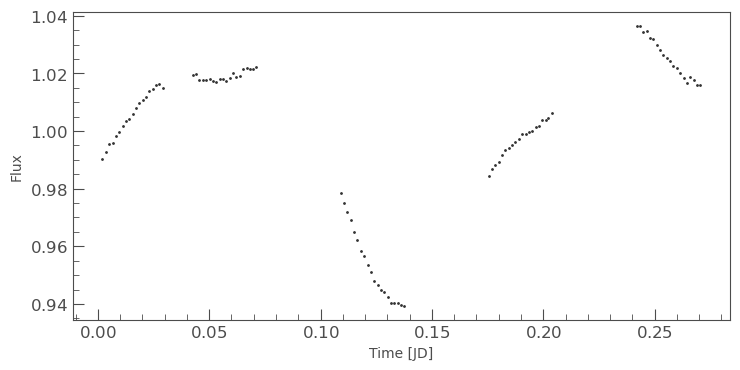

In [11]:
lc = l.LightCurve(time = t1, flux = J_norm)
lc.scatter()

In [12]:
lc.to_fits(path = dir_save + 'Luhman16B_J_Buen2015.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002DF8AA87CA0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002DF8AA86AD0>]

In [13]:
with fits.open(dir_save + 'Luhman16B_J_Buen2015.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['SPECBAND'] = Band_obs_J
    f[0].header['TSTART'] = TSTART
    f[0].header['TSTOP'] = TSTOP
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = filter
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

H_fits

In [14]:
t = []
for i in s['time']:
    t.append(i[0])
    
t2 = t *u.h
H_norm = H_norm * u.dimensionless_unscaled

In [15]:
lc = l.LightCurve(time = t2, flux = H_norm)
lc

time,flux,flux_err
,,
Time,float64,float64
0.0021064849570393562,0.9885474652568519,nan
0.0036111120134592056,0.9917397057640281,nan
0.005115744968255361,0.9933765312399917,nan
0.006620371093352635,0.9952169569233734,nan
0.008125041301051775,0.9970610164202341,nan
0.009629704058170319,0.999204174869166,nan
0.011134373644987742,1.0004988934945487,nan
0.012638963758945465,1.0016572542042192,nan


In [16]:
lc.to_fits(path = dir_save + 'Luhman16B_H_Buen2015.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002DF8AA84790>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002DF8AA51CF0>]

In [17]:
with fits.open(dir_save + 'Luhman16B_H_Buen2015.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['SPECBAND'] = Band_obs_H
    f[0].header['TSTART'] = TSTART
    f[0].header['TSTOP'] = TSTOP
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = filter
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

H2O_fits

In [18]:
t = []
for i in s['time']:
    t.append(i[0])
    
t3 = t * u.h 
H2_norm = H2_norm * u.dimensionless_unscaled

<Axes: xlabel='Time [JD]', ylabel='Flux'>

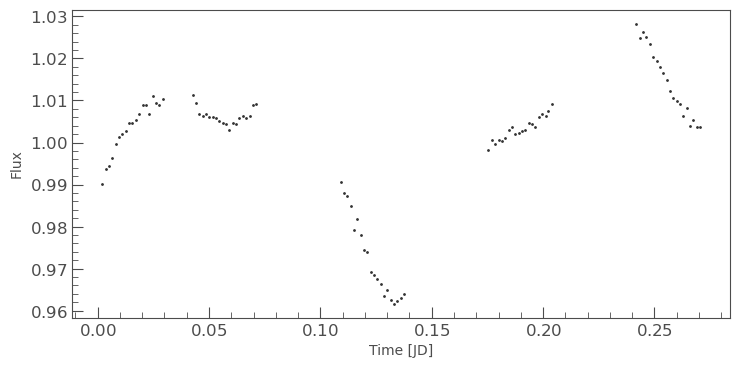

In [19]:
lc = l.LightCurve(time = t3, flux = H2_norm)
lc.scatter()

In [20]:
lc.to_fits(path = dir_save + 'Luhman16B_H2O_Buen2015.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002DF8AE6A6B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002DF8AED6860>]

In [21]:
with fits.open(dir_save + 'Luhman16B_H2O_Buen2015.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['SPECBAND'] = Band_obs_H2
    f[0].header['TSTART'] = TSTART
    f[0].header['TSTOP'] = TSTOP
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = filter
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

In [3]:
lc1 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Buenzli_2015/Luhman16B_J_Buen2015.fits", time_format = 'mjd')
lc2 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Buenzli_2015/Luhman16B_H_Buen2015.fits", time_format = 'mjd')
lc3 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Buenzli_2015/Luhman16B_H2O_Buen2015.fits", time_format = 'mjd')

<Axes: xlabel='Time', ylabel='Flux'>

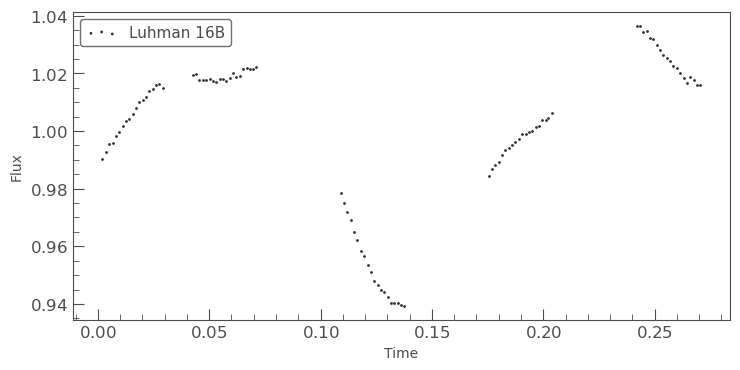

In [4]:
lc1.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

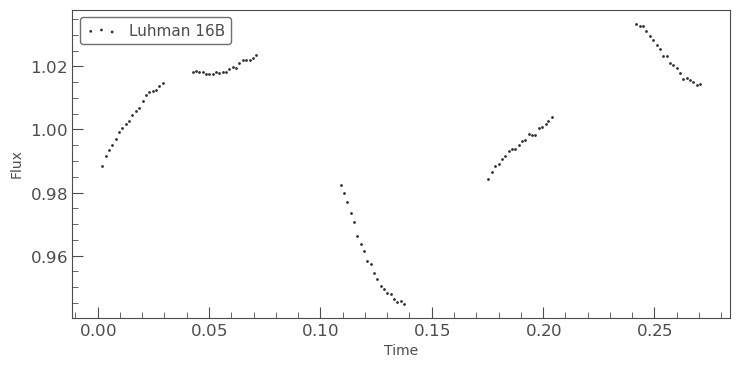

In [5]:
lc2.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

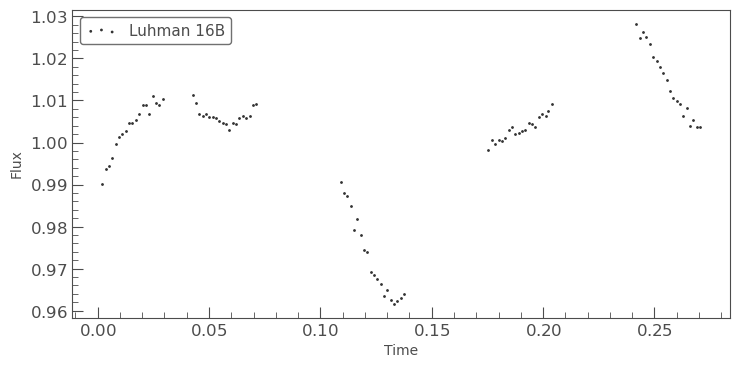

In [6]:
lc3.scatter()